In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import random

In [ ]:
#for pereptron learning
#sigmoid function
def sigmoid(x):
  return 1/(1+np.exp(-x))


alpha = 0.01
xin = []
with open('x.ext') as my_file:
    for line in my_file:
        xin.append(line.split())
del xin[-2:]
# xin.pop()
# xin.pop()
print(xin)
xin = np.array(xin)
print(xin)


tin = []
with open('t.ext') as my_file:
    for line in my_file:
      tin.append((line.split()))
          

    

del tin[-1:]

print(tin)
tin = np.array(tin)
tin=tin.astype(float)
xin=xin.astype(float)

print(np.dot(xin.T,tin))


#p_densPerceptron
def p_dens(w,y):
  E = objectivePerceptron(w,y)
  return np.exp(-E)


def ylearnget(w):
   a=np.dot(xin,w)
   return sigmoid(a)

# gradient and objective for perceptron learning (note )
def gradientPerceptron(w,y):
  a=np.dot(xin,w) # w is the input , x is from x.ext (we compute the probability of the parameters w)
  y=sigmoid(a) #sigmoid function (outpuds)
  e=tin-y # error between given output patterns t (t.ext) and y
  g=-x.T*e #gradient
  gM = alpha*w+g  #learning rule w+= alpha (learning rate) * gradient
  return gM


def objectivePerceptron(w,y): #objective function
  G= - (tin.T * np.log(y)+(1-tin.T)*np.log(1-y)) #y was computed in gradientPerceptron , t from t.ext
  EW= np.dot(w.T,w) / 2 #total of w^2
  M= G + alpha * EW  #value of objective funcition (measure of error)
  return M

In [ ]:
#changed version for perceptron learning!!!!!!!!!!!
def plot_scatter(X):
 # colors = np.random.rand(len(hist))
 # area = (30 * np.random.rand(len(hist)))**2  # 0 to 15 point radii

  x = []
  y = []

  for i in X:
    x.append(i[0])
    y.append(i[1])

  plt.scatter(x, y)
  plt.show()

def metropalis_hasting(steps, sigma):
  rejections = 0
  x_hist = []
  init_x = np.random.normal(0,sigma,3)
  x = init_x
  for i in range(steps):
    x_new = np.random.normal(x,0.1,3)
    ylearn=ylearnget(x_new) #added for perceptron
    a = p_dens(x_new,ylearn)/p_dens(x,ylearn) 
    a=a[0][0]#???
    if accept(a) == 1:
      x = x_new
      x_hist.append(x)
    else:
      rejections += 1
      x_hist.append(x)

  # plot_scatter(x_hist)
  return (rejections, np.array(x_hist))

In [ ]:
A = np.array([[250.25, -249.75],[ -249.75, 250.25]])

def gaussian(mu = 0, sigma = 1):
  return np.random.normal(mu, sigma, 2)

# x' interperted as x transposed
def p_dens(x):
  E = 1/2 * np.dot(np.transpose(x),np.dot(A,x))
  return np.exp(-E)

def accept(a):
  if np.isnan(a):
    return 0
  return np.random.binomial(1, min(a,1))

In [ ]:
def plot_scatter(X):
 # colors = np.random.rand(len(hist))
 # area = (30 * np.random.rand(len(hist)))**2  # 0 to 15 point radii

  x = []
  y = []

  for i in X:
    x.append(i[0])
    y.append(i[1])

  plt.scatter(x, y)
  plt.show()

def metropalis_hasting(steps, sigma):
  rejections = 0
  x_hist = []
  init_x = gaussian(sigma)
  x = init_x
  for i in range(steps):
    x_new = gaussian(x, 0.1)
    a = p_dens(x_new)/p_dens(x) 
    if accept(a) == 1:
      x = x_new
      x_hist.append(x)
    else:
      rejections += 1
      x_hist.append(x)

  # plot_scatter(x_hist)
  return (rejections, np.array(x_hist))

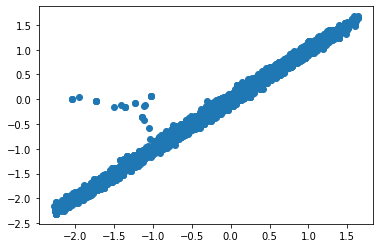

5431
[[-2.04869717e+00 -3.44854168e-04]
 [-2.04869717e+00 -3.44854168e-04]
 [-2.04869717e+00 -3.44854168e-04]
 ...
 [-4.88330084e-01 -5.37213114e-01]
 [-5.74528998e-01 -5.16683179e-01]
 [-5.74528998e-01 -5.16683179e-01]]


In [ ]:
rejections, hist = metropalis_hasting(10000, 0.1)
print(rejections)
print(hist)

In [ ]:
def Energy(x):
  return 1/2 * np.dot(np.transpose(x),np.dot(A,x))

def gradientE(x):
  g=np.array([x[0]*250.25-249.75*x[1],x[1]*250.25-249.75*x[0]])
  return g

def hamilton_monte_carlo(steps, tau, epsilon, sigmav):
  x = gaussian(sigma = sigmav)
  x_hist = np.array([])
  g = gradientE(x)
  E = Energy(x)
  rejections=0

  for l in range(steps):
    p = np.random.normal(0, 1, len(x))
    H = np.dot(np.transpose(p), p) / 2 + Energy(x)
    xnew = x
    gnew = g

    for s in range(tau):
      p = p - epsilon * gnew /2
      xnew = xnew + epsilon * p #!!!!!!!!!!!!!! += caused the error DO NOT USE
      gnew = gradientE(xnew)
      p = p - epsilon * gnew /2
    
    Enew = Energy(xnew)
    Hnew = np.dot(np.transpose(p), p) /2 + Enew
    dH = Hnew - H

    accept = False
    if dH < 0: 
      accept = True
    elif np.random.uniform(0,1) < np.exp(-dH):
      accept = True
    else:
      accept = False
    if accept:
      g = gnew
      x = xnew
      E = Enew
    else:
      rejections+=1

    x_hist = np.append(x_hist, x)
  # plot_scatter(np.array(np.split(x_hist, steps)))
  return rejections, np.array(np.split(x_hist, steps))

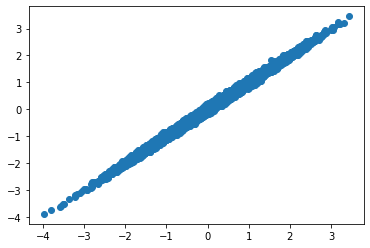

17


In [ ]:
rejections, hist = hamilton_monte_carlo(10000,100,0.01,0.1)
print(rejections)
# print(hist)

In [ ]:
def plot_metropalis_to_img(X, steps, sigma):
  x = []
  y = []
  
  for i in X:
    x.append(i[0])
    y.append(i[1])
  plt.figure() 
  plt.title("Metropalis-Hasting steps: {}, sigma: {}".format(steps, sigma))
  plt.scatter(x, y)
  plt.savefig('Images/MH/Metropalis_Hasting_steps_{}_sigma_{}.png'.format(steps, sigma))

def plot_hamilton_to_img(X, steps, tau, epsilon, sigma):
  x = []
  y = []

  for i in X:
    x.append(i[0])
    y.append(i[1])
  plt.figure() 
  plt.title("Hamilton MC steps: {}, tau: {}, epsilon: {}, sigma: {}".format(steps, tau, epsilon, sigma))
  plt.scatter(x, y)
  plt.savefig('Images/MC/Hamilton_MC_steps_{}_tau_{}_epsilon_{}_sigma_{}.png'.format(steps, tau, epsilon, sigma))

In [ ]:
steps = [10000]
sigma = [0.1, 0.5, 1]
epsilon = [0.01, 0.05, 0.1, 0.5]
tau = [10, 50, 100]

dictMH = list( {} for i in range(len(steps)* len(sigma)) )
MH_counter = 0
for step in steps:
  for s in sigma:
    rejections, hist = metropalis_hasting(step, s)
    dictMH[MH_counter]["rejections"] = rejections
    dictMH[MH_counter]["step"] = step
    dictMH[MH_counter]["sigma"] = s
    dictMH[MH_counter]["hist"] = hist
    dictMH[MH_counter]["ratio"] = rejections/step
    MH_counter += 1

    # plot_metropalis_to_img(hist, step, s)

dictHMC = list({} for i in range(len(steps)* len(sigma) * len(epsilon) * len(tau)))
HMC_counter = 0
for step in steps:
  for frogStep in tau:
    for e in epsilon:
      for s in sigma:
        rejections, hist = hamilton_monte_carlo(step, frogStep, e, s)
        dictHMC[HMC_counter]["rejections"] = rejections
        dictHMC[HMC_counter]["step"] = step
        dictHMC[HMC_counter]["sigma"] = s
        dictHMC[HMC_counter]["epsilon"] = e
        dictHMC[HMC_counter]["tau"] = frogStep
        dictHMC[HMC_counter]["hist"] = hist
        dictHMC[HMC_counter]["ratio"] = rejections/step

        HMC_counter += 1
        # plot_hamilton_to_img(hist, step, s, e, frogStep)

In [ ]:
minMH = min(dictMH, key=lambda x:x['ratio'])
print(minMH)

minHMC = min(dictHMC, key=lambda x:x['ratio'])
print(minHMC)

{'rejections': 5346, 'step': 10000, 'sigma': 1, 'hist': array([[ 2.66171378,  1.62445195],
       [ 2.66171378,  1.62445195],
       [ 2.67674605,  1.6515286 ],
       ...,
       [-0.091938  , -0.11318538],
       [-0.091938  , -0.11318538],
       [-0.091938  , -0.11318538]]), 'ratio': 0.5346}
{'rejections': 14, 'step': 10000, 'sigma': 0.5, 'epsilon': 0.01, 'tau': 100, 'hist': array([[-0.1557597 ,  1.02491597],
       [-0.08881517, -1.22707442],
       [-1.40028011, -0.39243876],
       ...,
       [-0.44233322, -0.47218963],
       [-2.00487901, -1.99656032],
       [-1.41277891, -1.46977381]]), 'ratio': 0.0014}
